<a href="https://colab.research.google.com/github/Arhin-Eben/Machine-learning-with-python/blob/master/Bootstrap_Aggregation_(Bagging)_W3schools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bootstrap Aggregation (Bagging)**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


In [ ]:
#load in the data and store it into X (input features) and y (target)
data = datasets.load_wine(as_frame=True)

X = data.data
y = data.target

#split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

#instantiate a base classifier and fit it to the training data
dtree = DecisionTreeClassifier(random_state=22)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

In [ ]:
y_pred = dtree.predict(X_test)
#accuracy_score(y_test, y_pred)

print("Train data accuracy:", accuracy_score(y_train, dtree.predict(X_train)))
print("Test data accuracy:", accuracy_score(y_test, y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


**Creating a Bagging Classifier**

In [7]:
#importing the necessary model
from sklearn.ensemble import BaggingClassifier

#create a range of values that represent the number of estimators
estimator_range = [2,4,6,8,10,12,14,16]

In [8]:
models = []
scores = []

for n_estimators in estimator_range:

  #Create bagging classifier
  clf = BaggingClassifier(n_estimators = n_estimators, random_state=22)

  #Fit the model
  clf.fit(X_train, y_train)

  #Append the model and score to the lists
  models.append(clf)
  scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

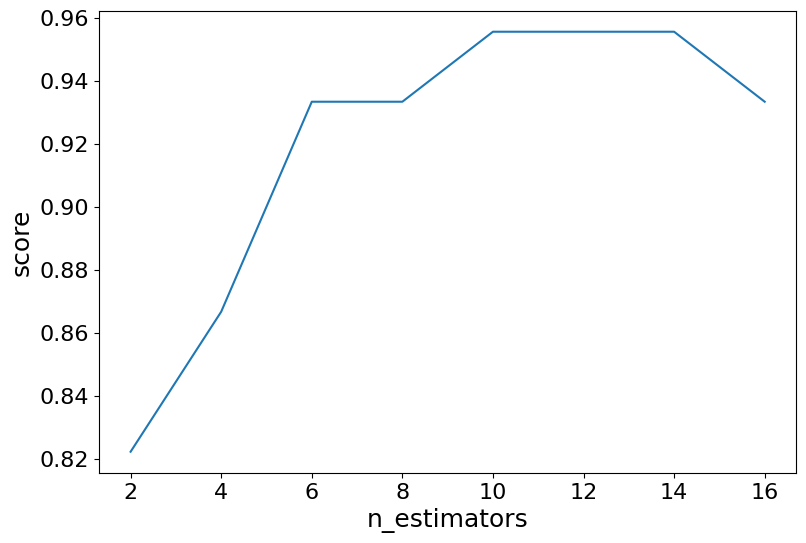

In [9]:
# visualize the improvement in model performance
import matplotlib.pyplot as plt

#Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

#Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

Create a model with out-of-bag metric.

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame=True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

oob_model = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)
oob_model.fit(X_train, y_train)

print("Out-of-bag score:", oob_model.oob_score_)


Out-of-bag score: 0.9398496240601504


**Generating Decision Trees from Bagging Classifier**

[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesi

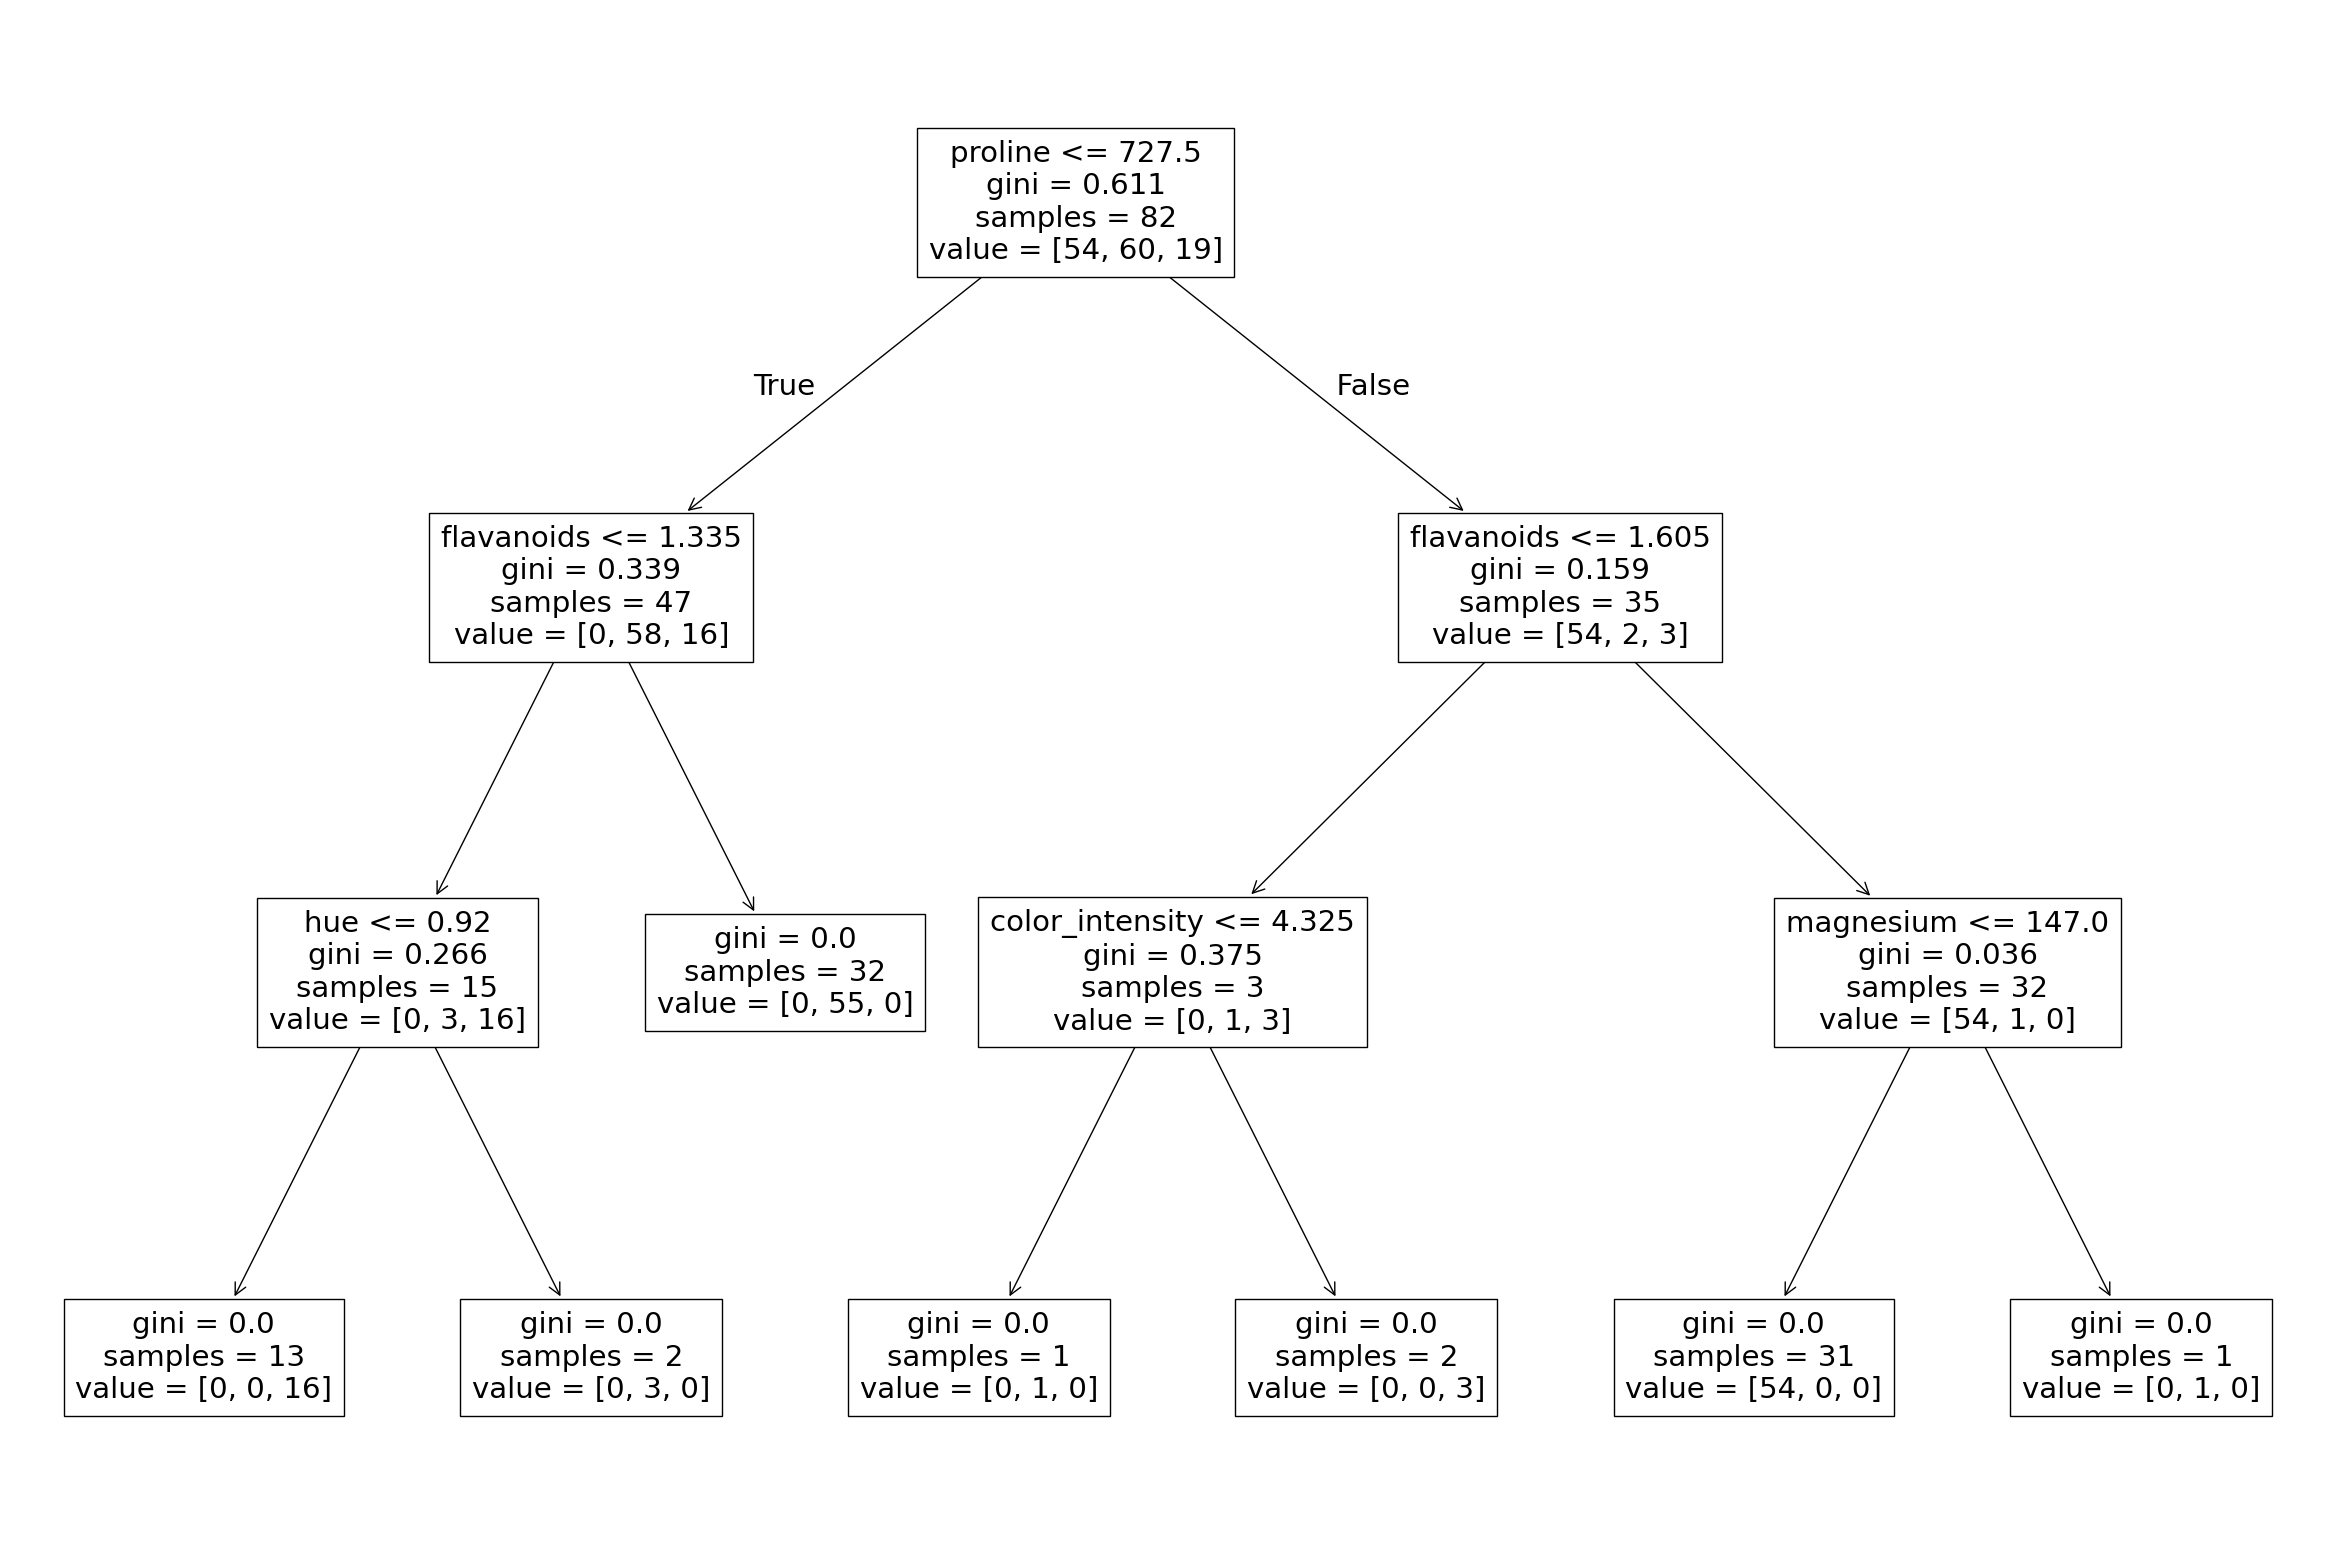

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True, random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(clf.estimators_[0], feature_names = X.columns)
